# Stochastic processes & wealth dynamics

## Topics for today

1.  Autoregressive processes: AR(1)
2.  Simulating wealth dynamics with IID income
3.  Simulating wealth dynamics with AR(1) income  

In [1]:
# Enable automatic reloading of external modules
%load_ext autoreload
%autoreload 2

***
## AR(1) process

-   One of the most widely used stochastic processes in economics and finance (linear & parsimonious)
-   Law-of-motion:
    $$
    \begin{aligned}
        x_{t+1} &= \mu + \rho x_t + \epsilon_{t+1} \\
        \epsilon_{t+1} &\stackrel{\text{iid}}{\sim} \mathcal{N}\left(0, \sigma^2\right)
    \end{aligned}
    $$

-   Parameters:

    -  $\mu$ controls the mean
    -  $\rho$ controls the autocorrelation
    -  $\sigma^2$ controls the variance of the error term $\epsilon_t$ (also called "innovation" or "shock")

-   Process is stationary if $\rho \in (-1, 1)$

-   Moments of the stationary distribution:

    -   (unconditional) mean:
        $$
        \mathbb{E}[x_t] = \frac{\mu}{1-\rho}
        $$

    -   (unconditional) variance:
        $$
        \text{Var}(x_t) = \frac{\sigma^2}{1-\rho^2}
        $$

    -   Stationary distribution:
        $$
        x_t \sim \mathcal{N}\left(\frac{\mu}{1-\rho}, \frac{\sigma^2}{1-\rho^2} \right)
        $$

***
### Simulating an AR(1) process

-   Simulate AR(1) for some given initial value $x_0$
-   Use [normal()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) to draw innovations $\epsilon_t$

In [2]:
import numpy as np


def simulate_ar1(x0, mu, rho, sigma, T, rng=None):

    # Create RNG instance
    if rng is None:
        rng = np.random.default_rng(seed=1234)

    # Draw random shocks from a normal distribution
    epsilon = rng.normal(loc=0, scale=sigma, size=T)

    # Create an array to store the simulated values
    x = np.empty(T + 1)

    # Set the initial value
    x[0] = x0

    # Simulate the AR(1) process using a for loop
    for t in range(T):
        x[t + 1] = mu + rho * x[t] + epsilon[t]

    return x

- Simulate AR(1) for $x_0 = 0$, $\mu = 0$, $\rho = 0.9$, $\sigma = 0.1$ for $T=100$ periods

In [3]:
# RNG instance with seed
seed = 1234
rng = np.random.default_rng(seed=seed)

# T = 100 periods
T = 100
# Initial value
x0 = 0
# Intercept
mu = 0.0
# Autocorrelation coefficient
rho = 0.9
# Standard deviation
sigma = 0.1


# Simulate the AR(1) process
sim = simulate_ar1(x0, mu, rho, sigma, T)  # Array of length T+1

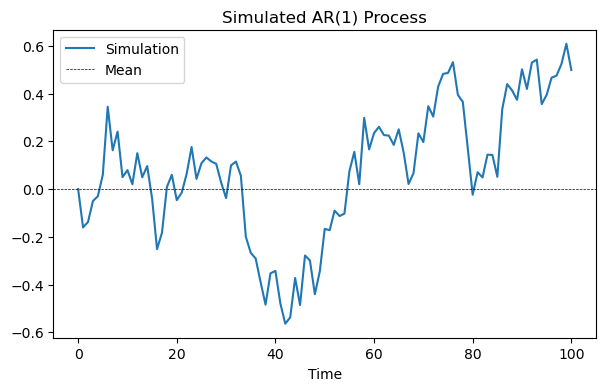

In [4]:
# Plot the simulated AR(1) process
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
# Use default x-values (0, 1, 2, ..., T)
plt.plot(sim, label="Simulation")
plt.xlabel("Time")
plt.title("Simulated AR(1) Process")
# Add unconditional mean
uncond_mean = mu / (1 - rho)
plt.axhline(uncond_mean, color="black", linestyle="--", lw=0.5, label="Mean")
plt.legend()

<div class="alert alert-info">
<h3> Your turn</h3>

Modify the above code to simulate the AR(1) from an initial value of <i>x<sub>0</sub> = 10</i>. Where does this simulated series converge to?
</div>

- Simulate and plot $N=20$ different sequences using `simulate_ar1()`

In [5]:
# Simulate 20 different sequences
N = 20

# Array to store the simulated data
data = np.zeros((N, T + 1))

# Set initial value
x0 = 0

# Create RNG instance
rng = np.random.default_rng(seed=1234)

# Simulate the AR(1) process N times
for i in range(N):
    data[i] = simulate_ar1(x0, mu, rho, sigma, T, rng=rng)

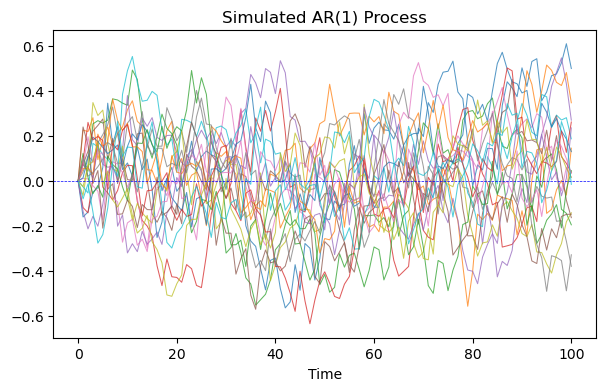

In [6]:
plt.figure(figsize=(7, 4))
plt.plot(data.T, alpha=0.75, lw=0.75)  # The alpha parameter controls transparency
plt.xlabel("Time")
plt.title("Simulated AR(1) Process")
# Add unconditional mean
plt.axhline(uncond_mean, color="blue", linestyle="--", lw=0.5, label="Mean")

<div class="alert alert-info">
<h3> Your turn</h3>

Let <i>µ = 1</i>, <i>ρ=0.95</i>, and <i>σ = 0.1</i>.
Using the function <tt>simulate_ar1()</tt>,
simulate 1,000,000 draws of <i>x<sub>t</sub></i> and verify that the unconditional mean and variance are close to the values given by the exact formulas above,
i.e., <i>E[x] = µ/(1-ρ)</i> and <i>Var(x) = σ<sup>2</sup> / (1-ρ<sup>2</sup>)</i>.
</div>

In [7]:
mu = 1
rho = 0.95
sigma = 0.1
x0 = 0.0
rng = np.random.default_rng(
    seed=1234
)  # RNG does not have to much impact beacuse of the large number of draws

# Number of periods
T = 1_000_000

# Simulate the AR(1) process
sim = simulate_ar1(x0, mu, rho, sigma, T, rng=rng)

# Calculate the unconditional mean and variance
sim_mean = np.mean(sim)
sim_var = np.var(sim)

# Calculate the theoretical mean and variance
theoretical_mean = mu / (1 - rho)
theoretical_var = sigma**2 / (1 - rho**2)

print(f"Simulated mean: {sim_mean:.8f}")
print(f"Theoretical mean: {theoretical_mean:.8f}")
print(f"\nSimulated variance: {sim_var:.8f}")
print(f"Theoretical variance: {theoretical_var:.8f}")

Simulated mean: 20.00188145
Theoretical mean: 20.00000000

Simulated variance: 0.10748999
Theoretical variance: 0.10256410


***
## Wealth dynamics

### Savings rule

-   Household $i$'s wealth $a_t$ evolves according to
    $$
    a_{i,t+1} = R (a_{i,t} - c_{i,t}) + y_{i,t+1}
    $$

    where

    -   $c_{i,t}$ is consumption in period $t$
    -   $y_{i,t+1}$ is labor income in period $t+1$
    -   $R$ is the fixed (exogenous) interest rate

-   Assume *exogenous* rule-of-thumb savings rate $s$ :

    $$
    \begin{aligned}
        c_{i,t} &= (1-s)a_{i,t} \\
        a_{i,t+1} &= R s a_{i,t} + y_{i,t+1}
    \end{aligned}
    $$


***
### Wealth dynamics with stochastic IID income

-   Assume log income is IID normal (income in levels is *log-normal*:
    $$
    \log y_{i,t+1} \stackrel{\text{iid}}{\sim} \mathcal{N}\left(\mu_y, \sigma_y^2 \right)
    $$

    Parameters:

    -   $\mu_y$: mean of log income
    -   $\sigma_y^2$: variance of log income

-   **Goal**: Simulate wealth dynamics of a cross-section of households


***
#### Analytical results (to verify simulation results)

-   For a log-normal random variable $X$ we have:

    $$
    \begin{aligned}
        \log X \stackrel{\text{iid}}{\sim} \mathcal{N}\left(\mu, \sigma^2 \right)
        \quad\Longrightarrow\quad

        \begin{cases}
        \mathbb{E}[X] &= e^{ \mu + \frac{1}{2}\sigma^2} \\
        \text{Var}(x) &= \left( e^{\sigma^2} - 1 \right) e^{2 \mu + \sigma^2}
        \end{cases}
    \end{aligned}
    $$

-   Using this result, we can find the moments of the stationary distribution of wealth:

    -   Mean:
        $$
        \mathbb{E}[a_{i,t}] = \frac{\mathbb{E}[y_{i,t}]}{1 - Rs}
        = \frac{e^{\mu_y + \frac{1}{2}\sigma_y^2}}{1 - Rs}
        $$

    -   Variance:
        $$
        \text{Var}(a_{i,t}) = \frac{\text{Var}(y_{i,t})}{1-(Rs)^2} = 
        \frac{\left( e^{\sigma_y^2} - 1 \right) e^{2 \mu_y + \sigma_y^2}}{1-(Rs)^2}
        $$

-   Requires condition $R s < 1$ to hold!

***
#### Simulating the wealth distribution

| Parameter  | Description | Value       |
|------------|-------------|-------------|
| s | Savings rate | 0.75 |
| $R$ | Gross return | 1.1 |
| $\sigma_y$ | Volatility of log labor income | 0.1 |
| $\mu_y$ | Mean of log labor income | $-\frac{1}{2}\sigma_y^2$|

In [21]:
from dataclasses import dataclass


@dataclass
class Parameters:
    s: float = 0.75  # Exogenous savings rate
    R: float = 1.1  # Gross return
    sigma_y: float = 0.1  # Standard deviation of log income
    mu_y: float = -(sigma_y**2.0) / 2.0  # Mean of log income

In [22]:
# Create an instance of the Parameters class
par = Parameters()

In [23]:
# Check for finite mean and variance of stationary distribution
assert par.R * par.s < 1

Finally, we verify that the analytical unconditional mean of income is 1 as intended, and we compute the mean of the stationary wealth distribution.

In [24]:
# Mean of stationary INCOME distribution
y_mean = np.exp(par.mu_y + par.sigma_y**2 / 2)

# Mean of stationary ASSET distribution
a_mean = y_mean / (1 - par.s * par.R)

print(f"Mean income: {y_mean:.3f}")
print(f"Mean wealth: {a_mean:.3f}")

Mean income: 1.000
Mean wealth: 5.714


<div class="alert alert-info">
<h3> Your turn</h3>

<p>
Simulate 100,000 income draws of <i>y<sub>t</sub></i> and verify that the realizations have a mean of one, <i>E[y<sub>t</sub>] = 1</i>.
</p>
<p>
<i>Hint:</i> You need to draw a sample from the underlying 
<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html">normal</a> 
distribution of <i>log y<sub>t</sub></i>
with parameters <i>μ<sub>y</sub></i> and <i>σ<sub>y</sub></i> and then apply the exponential function
<tt>np.exp()</tt>.
</p>
</div>

In [25]:
# simulate 100 000 income draws of y_t and verify that the
# realizations have a mean of one. You need to draw a sample from the underlying normal distribution and then exponentiate the result.

# Number of draws
N = 100_000

# Draw random shocks from a normal distribution
rng = np.random.default_rng(seed=1234)

# Draw N random shocks
epsilon = rng.normal(loc=par.mu_y, scale=par.sigma_y, size=N)

# Calculate the mean of the simulated income
sim_mean = np.exp(epsilon).mean()

print(f"Simulated mean: {sim_mean:.8f}")

Simulated mean: 1.00002502


##### Implementation

*Steps:*

1. Draw all income realizations for all $N$ households and all $T$ periods and store them in a $T \times N$ array.
2. Set the initial assets for all households to the given value $a_0$.
3. Use the asset law-of-motion to simulate assets forward one period at a time.

In [26]:
def simulate_wealth_iid_income(par: Parameters, a0, T, N, rng=None):
    """
    Simulate the evolution of wealth over time when income is IID.

    Parameters
    ----------
    par : Parameters
    a0 : float
        Initial wealth.
    T : int
        Number of time periods to simulate.
    N : int
        Number of individuals to simulate.
    rng : numpy.random.Generator, optional
        A random number generator instance.

    Returns
    -------
    a_sim : numpy.ndarray
        A (T+1, N) array where each column represents the simulated wealth path of an household.
    """
    if rng is None:
        rng = np.random.default_rng(seed=1234)

    # Random draws of IID income
    log_y = rng.normal(loc=par.mu_y, scale=par.sigma_y, size=(T, N))

    # Income in levels
    y = np.exp(log_y)

    # Create array to store the simulated wealth paths
    a_sim = np.zeros((T + 1, N))

    # Set initial value (identical for all households)
    a_sim[0] = a0

    # Simulate wealth forward, one period at a time
    for t in range(T):
        # Savings out of beginning-of-period assets
        savings = par.s * a_sim[t]
        # Next-period assets
        a_sim[t + 1] = par.R * savings + y[t]

    return a_sim

##### Simulating a small sample

In [46]:
# Number of households
N = 20
# Number of periods to simulate
T = 100

# Initial assets
a0 = 1.0

# RNG instance
rng = np.random.default_rng(seed=1234)

a_sim = simulate_wealth_iid_income(par, a0, T, N, rng=rng)

a_sim_mean = np.mean(a_sim, axis=1)

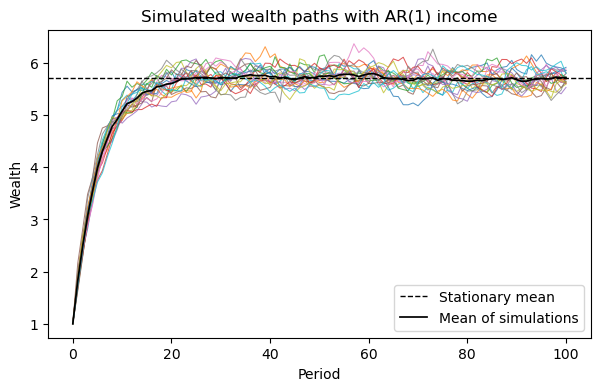

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.plot(a_sim, alpha=0.75, lw=0.75)
plt.xlabel("Period")
plt.ylabel("Wealth")
plt.title("Simulated wealth paths with AR(1) income")
# Add unconditional mean of wealth distribution
plt.axhline(a_mean, color="black", ls="--", lw=1, label="Stationary mean")
# Add average of simulated wealth paths
plt.plot(a_sim_mean, color="black", ls="-", lw=1.25, label="Mean of simulations")
plt.legend(loc="lower right")

##### Simulating a large sample

In [56]:
# Number of households
N = 100_000
# Number of periods to simulate
T = 100

# Create RNG instance
rng = np.random.default_rng(seed=1234)

# Simulate the wealth paths (result is an array of shape (T+1, N))
a_sim = simulate_wealth_iid_income(par, a0, T, N, rng)

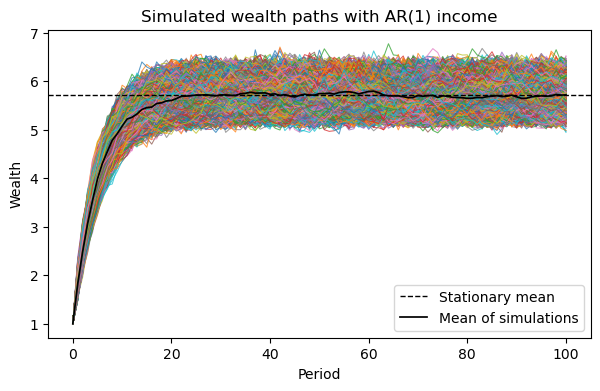

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.plot(a_sim, alpha=0.75, lw=0.75)
plt.xlabel("Period")
plt.ylabel("Wealth")
plt.title("Simulated wealth paths with AR(1) income")
# Add unconditional mean of wealth distribution
plt.axhline(a_mean, color="black", ls="--", lw=1, label="Stationary mean")
# Add average of simulated wealth paths
plt.plot(a_sim_mean, color="black", ls="-", lw=1.25, label="Mean of simulations")
plt.legend(loc="lower right")

***
##### Comparing simulated to analytical moments

-   Compute analytical moments using formulates from above
-   Compute moments of simulated data
-   Plot analytical vs. simulated cross-sectional mean and variance

In [58]:
from lecture08_iid_income import compute_wealth_mean, compute_wealth_var

# Compute analytical mean and variance
a_mean_exact = compute_wealth_mean(par)
a_var_exact = compute_wealth_var(par)

In [62]:
# Compute simulated mean and variance
a_mean_sim = np.mean(a_sim, axis=1)
a_var_sim = np.var(a_sim, axis=1)

# Print the results
print(f"Exact mean: {a_mean_exact:.8f}, approx. mean: {a_mean_sim[-1]:.8f}")
print(f"Exact variance: {a_var_exact:.8f}, approx. variance: {a_var_sim[-1]:.8f}")

Exact mean: 5.71428571, approx. mean: 5.71292844
Exact variance: 0.03146823, approx. variance: 0.03160477


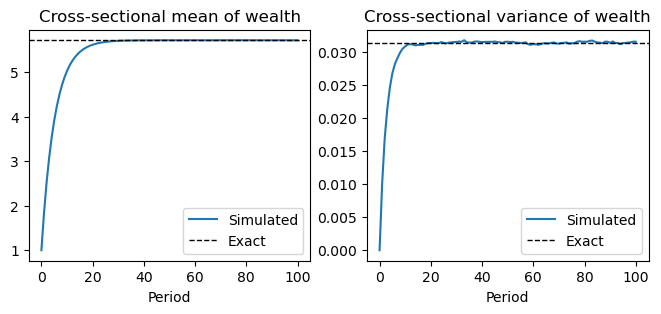

In [63]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True)

# Plot simulated vs. analytical mean
ax1.plot(a_mean_sim, label="Simulated")
ax1.axhline(a_mean_exact, color="black", ls="--", lw=1, label="Exact")
ax1.set_xlabel("Period")
ax1.set_title("Cross-sectional mean of wealth")
ax1.legend(loc="lower right")

# Plot simulated vs. analytical variance
ax2.plot(a_var_sim, label="Simulated")
ax2.axhline(a_var_exact, color="black", ls="--", lw=1, label="Exact")
ax2.set_title("Cross-sectional variance of wealth")
ax2.set_xlabel("Period")
ax2.legend(loc="lower right")

***
##### Measuring wealth inequality

-   Use Gini coefficient to measure wealth inequality in the simulated economy
-   Implement `gini()` function using [formula for sorted arrays](https://en.wikipedia.org/wiki/Gini_coefficient#Alternative_expressions):

    $$
    G_t = \frac{2}{N} \frac{\sum_{i=1}^N i \cdot a_{i,t}}%
        {\sum_{i=1}^N a_{i,t}}
        - \frac{N+1}{N}
    $$

-   Use [np.sort()](https://numpy.org/doc/stable/reference/generated/numpy.sort.html) to sort NumPy array

In [69]:
def gini(x):
    """
    Compute the Gini coefficient of an array.

    Parameters
    ----------
    x : numpy.ndarray
        An array of income, wealth, etc.

    Returns
    -------
    float
        The Gini coefficient.
    """
    # Sort array
    x_sorted = np.sort(x)

    # Number of elements in x
    n = len(x)

    ii = np.arange(1, n + 1)

    frac = np.sum((x_sorted * ii) / np.sum(x_sorted))

    # Gini coefficient
    G = 2 * frac / n - (n + 1) / n

    return G

In [72]:
a_last = a_sim[-1]

G = gini(a_last)

print(f"Gini coefficient: {G:.4f}")

Gini coefficient: 0.0176


<div class="alert alert-info">
<h3> Your turn</h3>

Change the parameter <i>σ<sub>y</sub></i> governing the volatility of income to <i>σ<sub>y</sub> = 0.5</i>
and rerun the code for the whole current section. What happens to average wealth in the economy and to the Gini coefficient?
</div>

In [ ]:
# Run simulation with sigma = 0.5
par = Parameters(sigma_y=0.5)

N = 100_000

a_sim = simulate_wealth_iid_income(par, a0, T, N, rng)

a_last = a_sim[-1]

G = gini(a_last)

print(f"Gini coefficient: {G:.4f}")

Gini coefficient: 0.0910


***
### Wealth dynamics with persistent income

-   Assume now that household $i$'s income follows an AR(1) in logs:
$$
\begin{aligned}
\log y_{i,t+1} &= \mu_y + \rho \log y_{i,t} + \epsilon_{i,t+1} \\
\epsilon_{i,t+1} &\stackrel{\text{iid}}{\sim} \mathcal{N}\left(0, \sigma_{\epsilon}^2 \right)
\end{aligned}
$$


***
#### Analytical results (to verify simulation results)

-   **Income:**
    -   Stationary distribution of log income:

        $$
        \log y_{i,t} \sim \mathcal{N}\left(\frac{\mu_y}{1-\rho}, \frac{\sigma_{\epsilon}^2}{1-\rho^2} \right)
        $$

    -   Mean of stationary income distribution:
        $$
        \mathbb{E}[y_{i,t}] = \exp\left\{\frac{\mu_y}{1-\rho} + \frac{1}{2} \frac{\sigma_{\epsilon}^2}{1-\rho^2}\right\}
        $$

-   **Assets:**
    -   Mean of stationary asset distribution:

        $$
        \mathbb{E}[a_{i,t}] = \frac{\mathbb{E}[y_{i,t}]}{1 - Rs}
        $$

    -   Variance? No closed-form expression available.

***
#### Simulating the wealth distribution

| Parameter  | Description | Value       |
|------------|-------------|-------------|
| s | Savings rate | 0.75 |
| $R$ | Gross return | 1.1 |
| $\sigma_y$ | Volatility of log labor income | 0.1 |
| $\rho$ | Autocorrelation of log labor income | 0.95 |
| $\mu_y$ | Mean of log labor income | $- \frac{1}{2} \frac{\sigma_{\epsilon}^2}{1+\rho}$ |


In [110]:
from dataclasses import dataclass


@dataclass
class Parameters:
    """
    Container to store model parameters
    """

    s: float = 0.75  # Exogenous savings rate
    R: float = 1.1  # Gross return
    sigma_eps: float = 0.1  # Conditional standard deviation of log income
    rho: float = 0.95  # Persistence of log income
    mu_y: float = -(sigma_eps**2.0) / 2.0 / (1 + rho)  # Intercept of log income

In [111]:
# Create an instance of the Parameters class
par = Parameters()

-   Compute analytical mean of income and assets

In [112]:
# Mean of stationary INCOME distribution
y_mean = np.exp(par.mu_y / (1 - par.rho) + par.sigma_eps**2 / 2 / (1 - par.rho**2))

# Mean of stationary ASSET distribution
a_mean = y_mean / (1 - par.s * par.R)

print(f"Mean income: {y_mean:.3f}")
print(f"Mean wealth: {a_mean:.3f}")

Mean income: 1.000
Mean wealth: 5.714


<div class="alert alert-info">
<h3> Your turn</h3>

Simulate a time series of 10,000,000 income draws <i>y<sub>t</sub></i> and verify that the realizations have a mean of one.
Use the <tt>simulate_ar1()</tt> function we wrote earlier for this task.

</div>

##### Implementation

*Steps:*

1. Draw all AR(1) shock realizations for all $N$ households and all $T$ periods and store them in a $T \times N$ array.
2. Assume that all individuals start with the same income which corresponds to the unconditional mean of the AR(1).
3. Set the initial assets for all households to the given value $a_0$.
4. Use the AR(1) law-of-motion to simulate next-period income given current income.
5. Use the asset law-of-motion to simulate next-period assets.

In [100]:
def simulate_wealth_ar1_income(par: Parameters, a0, T, N, rng=None):
    """
    Simulate the evolution of wealth over time if income follows an AR(1).

    Parameters
    ----------
    par : Parameters
    a0 : float
        Initial wealth.
    T : int
        Number of time periods to simulate.
    N : int
        Number of individuals to simulate.
    rng : numpy.random.Generator, optional
        A random number generator instance.

    Returns
    -------
    a_sim : numpy.ndarray
        A (T+1, N) array where each column represents the simulated wealth path of a household.
    """
    if rng is None:
        rng = np.random.default_rng(seed=1234)

    # Random draws AR(1) innovations (epsilon)
    epsilon = rng.normal(loc=0, scale=par.sigma_eps, size=(T, N))

    # Compute mean log income
    log_y_mean = par.mu_y / (1 - par.rho)

    # Assume that all individuals start with the same income
    log_y = np.full(N, fill_value=log_y_mean)

    a_sim = np.zeros((T + 1, N))
    a_sim[0] = a0

    for t in range(T):
        # Savings out of beginning-of-period assets
        savings = par.s * a_sim[t]

        # Log income next period
        log_y = par.mu_y + par.rho * log_y + epsilon[t]

        # Next-period assets
        a_sim[t + 1] = par.R * savings + np.exp(log_y)

    return a_sim

##### Simulating a small sample

In [113]:
# Initial wealth (identical for all households)
a0 = 1.0
# Number of periods to simulate
T = 100
# Number of households to simulate
N = 20

# Create RNG instance
rng = np.random.default_rng(seed=1234)

# Simulate the wealth paths (result is an array of shape (T+1, N))
a_sim = simulate_wealth_ar1_income(par, a0, T, N, rng)

# Mean of simulated time series
a_sim_mean = np.mean(a_sim, axis=1)

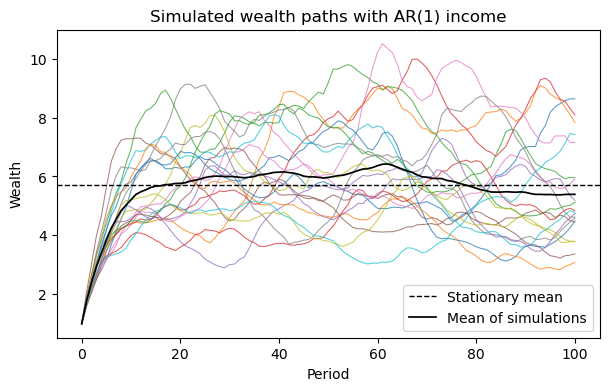

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))

plt.plot(a_sim, alpha=0.75, lw=0.75)
plt.xlabel("Period")
plt.ylabel("Wealth")
plt.title("Simulated wealth paths with AR(1) income")
# Add unconditional mean of wealth distribution
plt.axhline(a_mean, color="black", ls="--", lw=1, label="Stationary mean")
# Add average of simulated wealth paths
plt.plot(a_sim_mean, color="black", ls="-", lw=1.25, label="Mean of simulations")
plt.legend(loc="lower right")

##### Simulating a large sample

In [114]:
# Number of households
N = 100_000
# Number of periods to simulate
T = 100

# Create RNG instance
rng = np.random.default_rng(seed=1234)

# Simulate the wealth paths (result is an array of shape (T+1, N))
a_sim = simulate_wealth_ar1_income(par, a0, T, N, rng)

***
##### Comparing simulated to analytical moments

-   Compute analytical moments using formulates from above
-   Compute moments of simulated data
-   Plot analytical vs. simulated cross-sectional mean and variance

In [115]:
from lecture08_ar1_income import compute_wealth_mean

# Compute analytical mean
a_mean_exact = compute_wealth_mean(par)

In [116]:
# Mean of simulated time series
a_sim_mean = np.mean(a_sim, axis=1)

# Cross-sectional variance of simulated time series
a_sim_var = np.var(a_sim, axis=1)

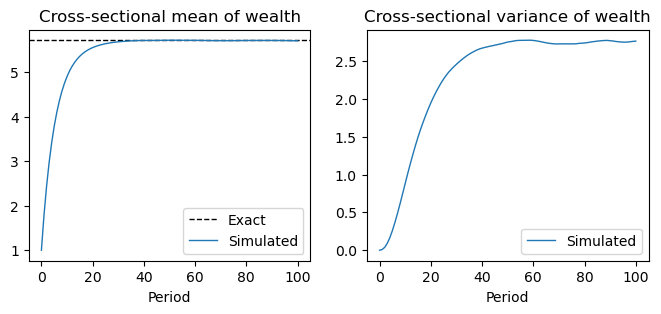

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3), sharex=True)

# Plot simulated vs. analytical mean
ax1.axhline(a_mean_exact, color="black", ls="--", lw=1, label="Exact")
ax1.plot(a_sim_mean, lw=1, label="Simulated")
ax1.set_xlabel("Period")
ax1.set_title("Cross-sectional mean of wealth")
ax1.legend(loc="lower right")

# Plot simulated variance
ax2.plot(a_sim_var, lw=1, label="Simulated")
ax2.set_title("Cross-sectional variance of wealth")
ax2.set_xlabel("Period")
ax2.legend(loc="lower right")

In [118]:
# Select cross section from last simulated period
last_cross_section = a_sim[-1]

G = gini(last_cross_section)
print(f"Wealth Gini coefficient: {G:.3f}")

Wealth Gini coefficient: 0.160


***
##### Measuring wealth inequality

<div class="alert alert-info">
<h3> Your turn</h3>

Change the parameter <i>ρ</i> governing the persistence of income to
<ol>
    <li><i>ρ=0.5</i></li>
    <li><i>ρ=0.99</i></li>
</ol>
and rerun the code for the whole current section. What happens to average wealth in the economy and to the Gini coefficient?
</div>